In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing steps

In [5]:
# Handling missing values

data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.drop(columns = 'Loan_ID', inplace=True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
gen_mode = data['Gender'].mode()[0]
data['Gender'].fillna(gen_mode, inplace = True)

mar_mode = data['Married'].mode()[0]
data['Married'].fillna(mar_mode, inplace = True)

dep_mode = data['Dependents'].mode()[0]
data['Dependents'].fillna(dep_mode, inplace = True)

self_mode = data['Self_Employed'].mode()[0]
data['Self_Employed'].fillna(self_mode, inplace = True)

In [9]:
data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data['Credit_History'] = data['Credit_History'].fillna((data['Credit_History']).median())

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna((data['Loan_Amount_Term']).median())

data['LoanAmount'] = data['LoanAmount'].fillna((data['LoanAmount']).median())

In [11]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Outier detection

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


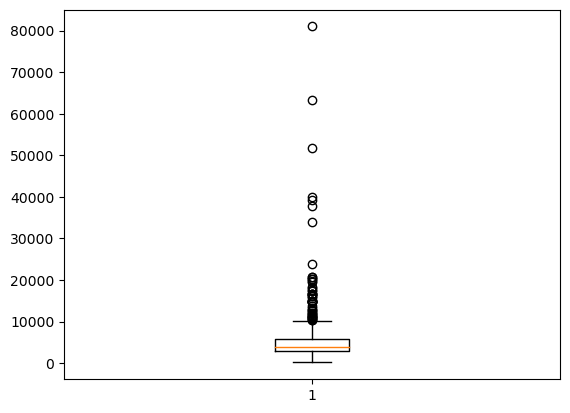

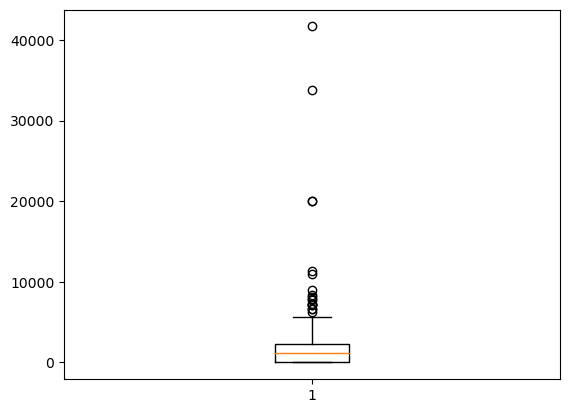

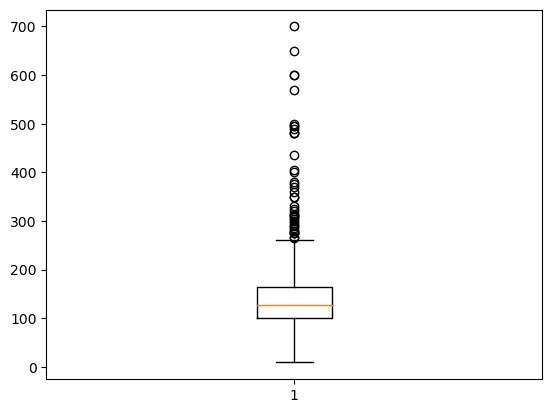

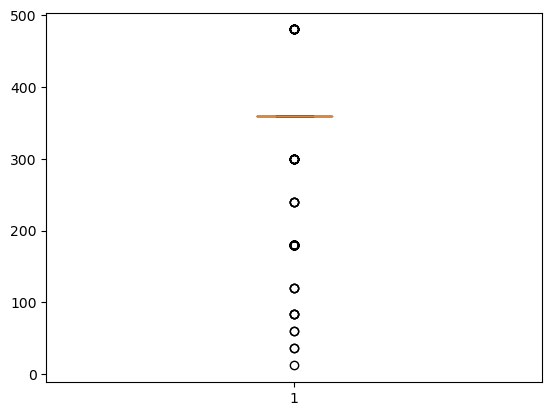

In [13]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

plt.boxplot(data['CoapplicantIncome'])
plt.show()

plt.boxplot(data['LoanAmount'])
plt.show()

plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [14]:
# Applying a function for imputting method

def impute(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    iqr = q3 - q1
    
    up_lim = q3 + 1.5 * iqr
    low_lim = q1 - 1.5 * iqr
    
    print("IQR = ",iqr, " Upper limit = ",up_lim, " Lower limit = ",low_lim)
    
    return column.apply(lambda x: up_lim if x > up_lim else(low_lim if x < low_lim else x))

In [15]:
data['ApplicantIncome'] = impute(data['ApplicantIncome'])

data['CoapplicantIncome'] = impute(data['CoapplicantIncome'])

data['LoanAmount'] = impute(data['LoanAmount'])

data['Loan_Amount_Term'] = impute(data['Loan_Amount_Term'])

IQR =  2917.5  Upper limit =  10171.25  Lower limit =  -1498.75
IQR =  2297.25  Upper limit =  5743.125  Lower limit =  -3445.875
IQR =  64.5  Upper limit =  261.5  Lower limit =  3.5
IQR =  0.0  Upper limit =  360.0  Lower limit =  360.0


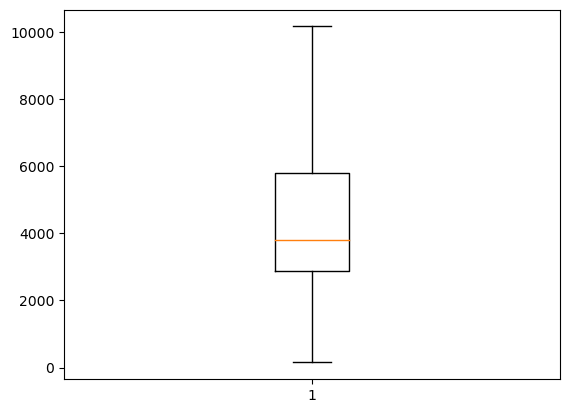

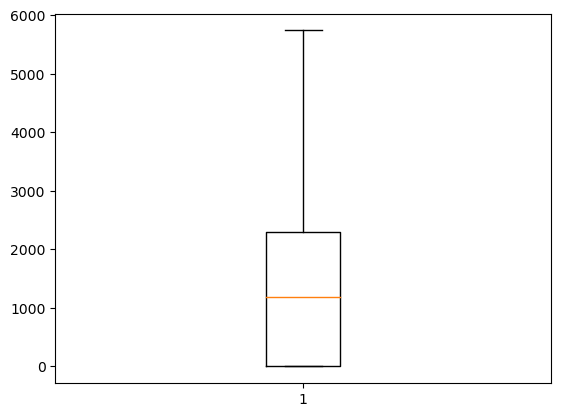

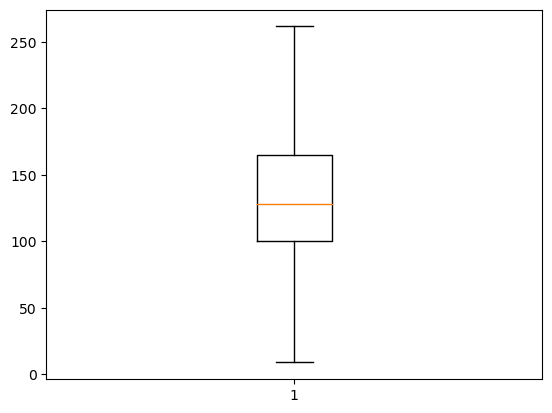

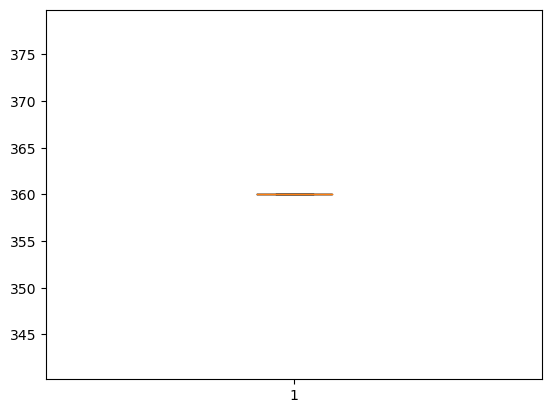

In [16]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

plt.boxplot(data['CoapplicantIncome'])
plt.show()

plt.boxplot(data['LoanAmount'])
plt.show()

plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [17]:
# Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [18]:
data['Dependents'] = data['Dependents'].str.strip('+')
data['Dependents'] = data['Dependents'].astype('int32')

In [19]:
data = pd.get_dummies(data,columns = ['Property_Area'])

In [20]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,1,False,False,True
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,True,False,False
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,1,False,False,True
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,1,False,False,True
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,True


In [21]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

columns_to_scale = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

data[columns_to_scale] = min_max.fit_transform(data[columns_to_scale])

In [22]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.445764,0.247200,0.508379,0.0,0.855049,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.247459,0.282878,0.220910,0.0,0.352339,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.272172,0.000000,0.361386,0.0,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.365473,0.206943,0.471287,0.0,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.563303,0.400000,0.616832,0.0,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [23]:
# Splitting the dataset

x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Ensemble learning techniques

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [27]:
rf_pred = rfc.predict(x_test)

In [28]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Random Forest Accuracy: ',rf_accuracy)

Random Forest Accuracy:  0.7642276422764228


In [29]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators = 100, random_state = 1)
abc.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [30]:
ab_pred = abc.predict(x_test)

In [31]:
ab_accuracy = accuracy_score(y_test, ab_pred)
print('Ada Boost Accuracy: ', ab_accuracy)

Ada Boost Accuracy:  0.7642276422764228


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [33]:
gb_pred = gbc.predict(x_test)

In [34]:
gb_accuracy = accuracy_score(y_test, gb_pred)
print('Gradient Boosting Accuracy: ', gb_accuracy)

Gradient Boosting Accuracy:  0.7642276422764228
